# FSL 

Doesnt work 

In [25]:
import fsl
from nilearn.maskers import NiftiLabelsMasker
from nilearn.datasets import fetch_atlas_aal
from nilearn.image import load_img
from nilearn.plotting import view_img
import os
import dicom2nifti
import nibabel as nib
import numpy as np

In [2]:
data_dir = 'data'

In [10]:
dicom2nifti.convert_directory(os.path.join(data_dir, 'MPRAGE'), os.path.join(data_dir, 'MPRAGE'))

c:\Users\huw\OneDrive\Documents\Research_Internship\MPhys_scripts\.conda\Lib\site-packages\numpy\_core\fromnumeric.py:867: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
C:\Users\huw\AppData\Local\Temp\ipykernel_3076\2412788211.py:2: UserWarning: Casting data from int32 to float32
  view_img(mri, cmap="Greys")



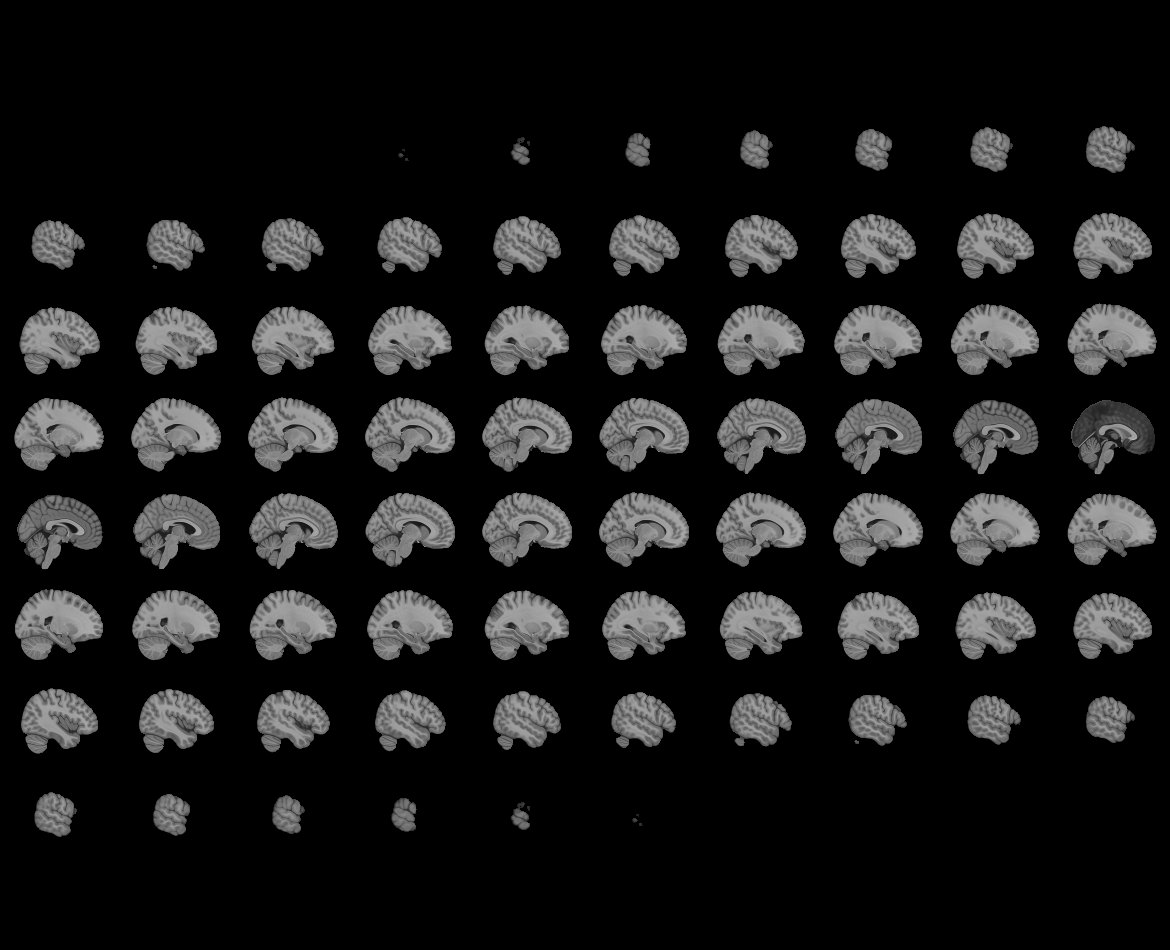
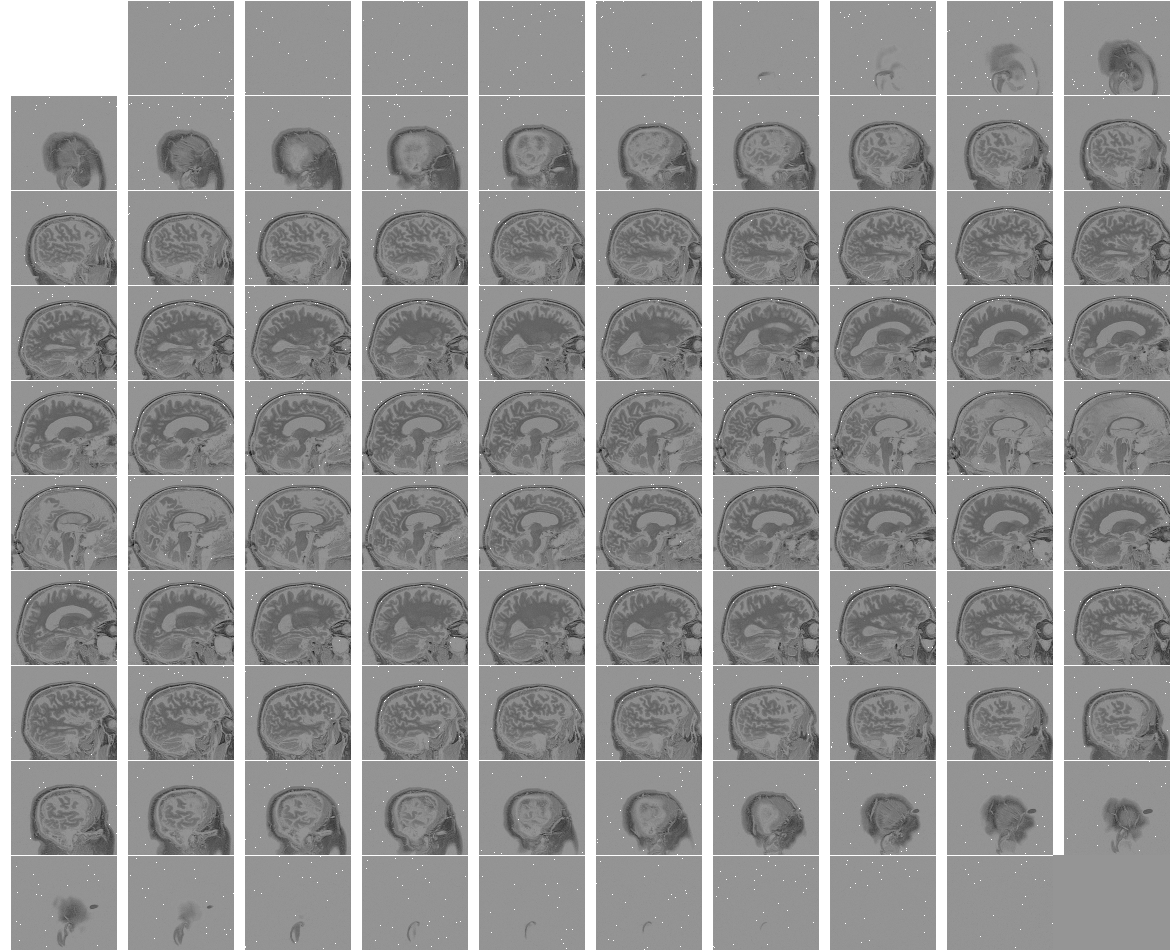

In [4]:
mri = load_img(os.path.join(data_dir, "MPRAGE/2_mp-rage.nii.gz"))
view_img(mri, cmap="Greys")

In [ ]:
dicom2nifti.dicom_array_to_nifti(os.path.join(data_dir, 'fdg_pet'), os.path.join(data_dir, 'fdg_pet'), force=True)

AttributeError: module 'dicom2nifti' has no attribute 'dicom_array_to_nifti'

In [41]:
import pydicom


# Define paths
input_dir = os.path.join(data_dir, 'fdg_pet')
output_path = os.path.join(data_dir, 'fdg_pet_nifti', 'fdg_pet.nii.gz')

# Read and patch DICOMs
dicom_files = []
for root, _, files in os.walk(input_dir):
    for f in files:
        path = os.path.join(root, f)
        try:
            dcm = pydicom.dcmread(path)
            # Patch missing attributes
            if not hasattr(dcm, 'RepetitionTime'):
                dcm.RepetitionTime = 100  # Dummy value in ms
            if not hasattr(dcm, 'EchoTime'):
                dcm.EchoTime = 100  # Dummy value in ms
            dicom_files.append(dcm)
        except:
            continue

# Ensure output directory exists
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Convert
dicom2nifti.convert_dicom.dicom_array_to_nifti(
    dicom_files,
    output_path
)

print(len(dicom_files))

654


In [ ]:
img = nib.load(os.path.join(data_dir, 'fdg_pet_nifti', 'fdg_pet.nii.gz'))

# Get the data array
data = img.get_fdata()

# Calculate the mean along the time axis (axis=3 for 4D data)
average_data = np.mean(data, axis=3)

# Create a new nibabel image with the averaged data
average_img = nib.Nifti1Image(average_data, img.affine)

# Save the averaged image to a new NIfTI file
nib.save(average_img, os.path.join(data_dir, 'fdg_pet_nifti', 'averaged_functional_images.nii.gz'))

336



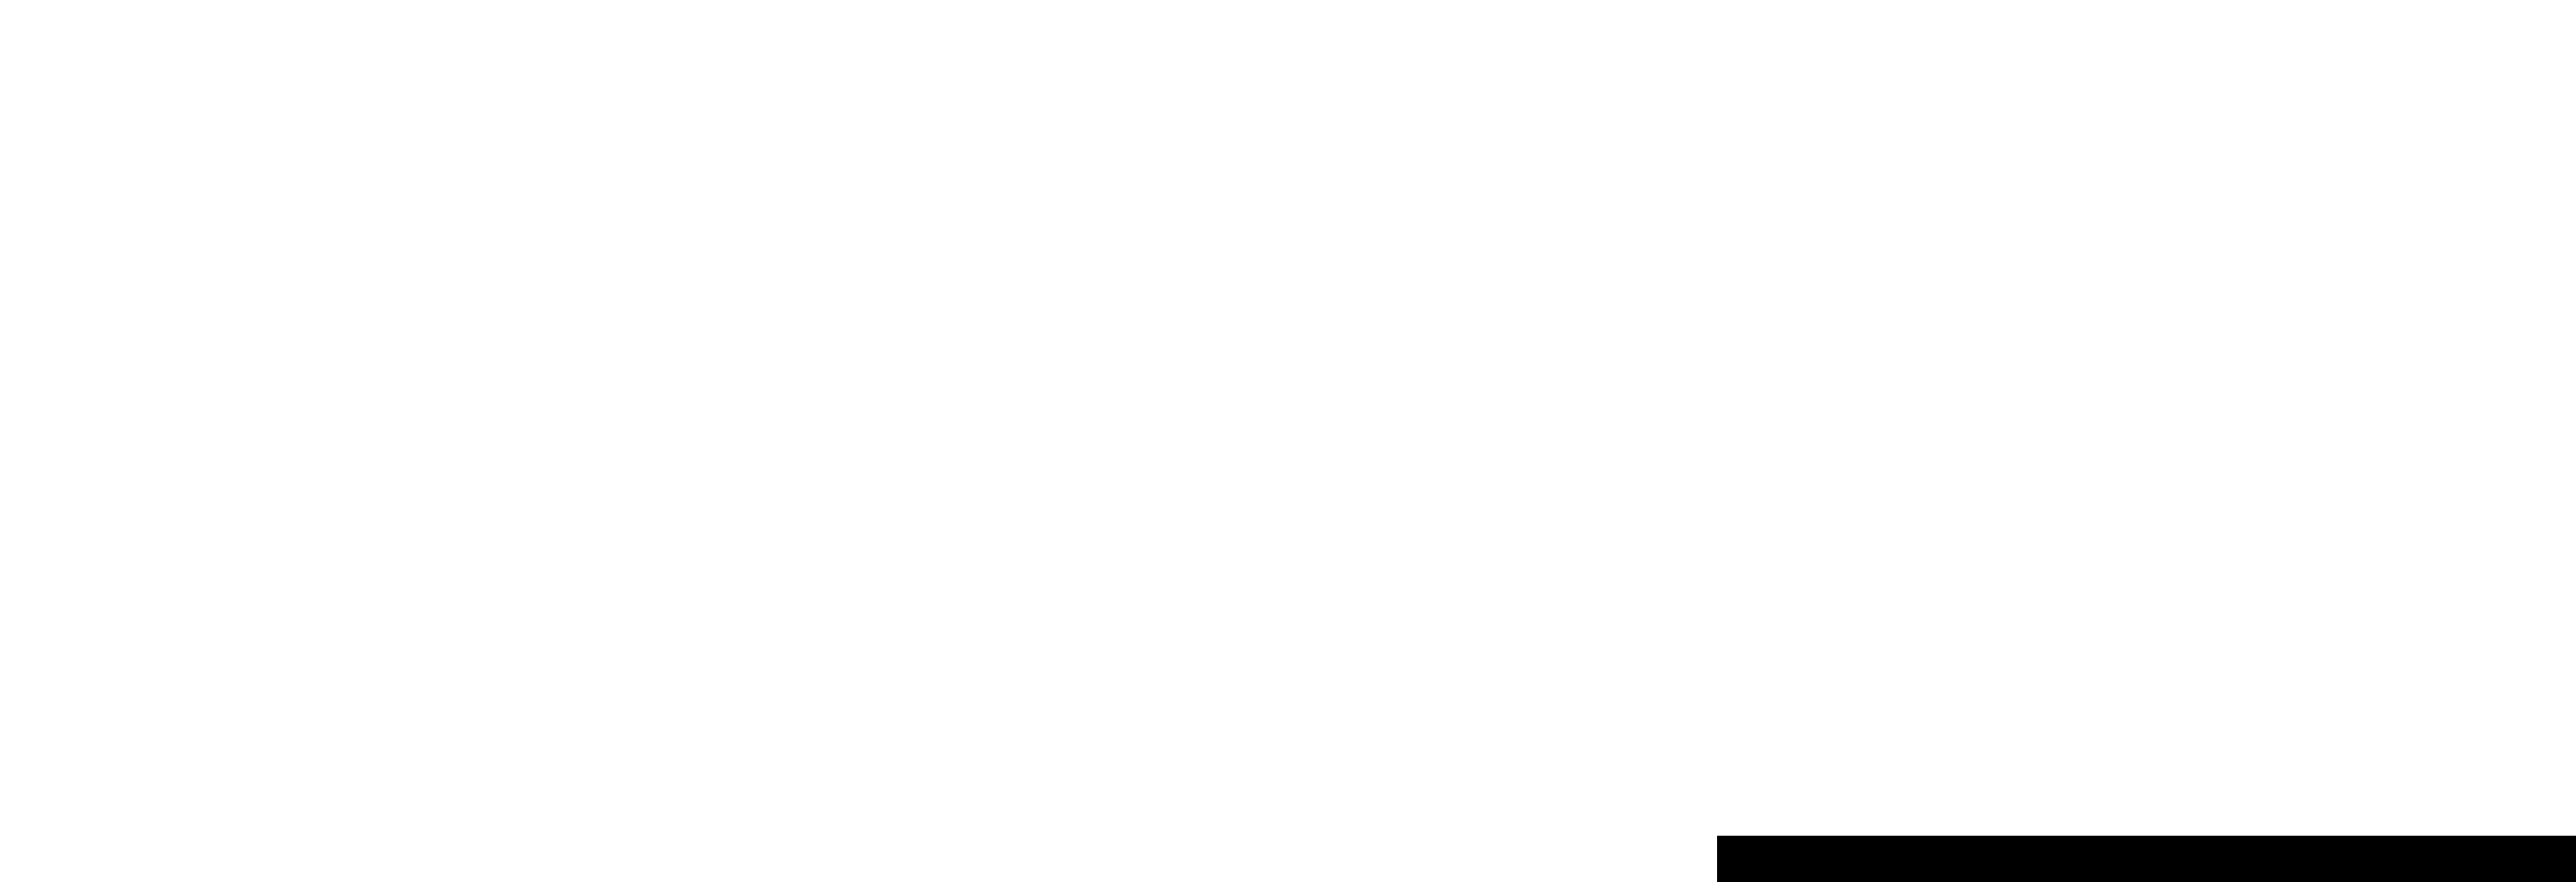
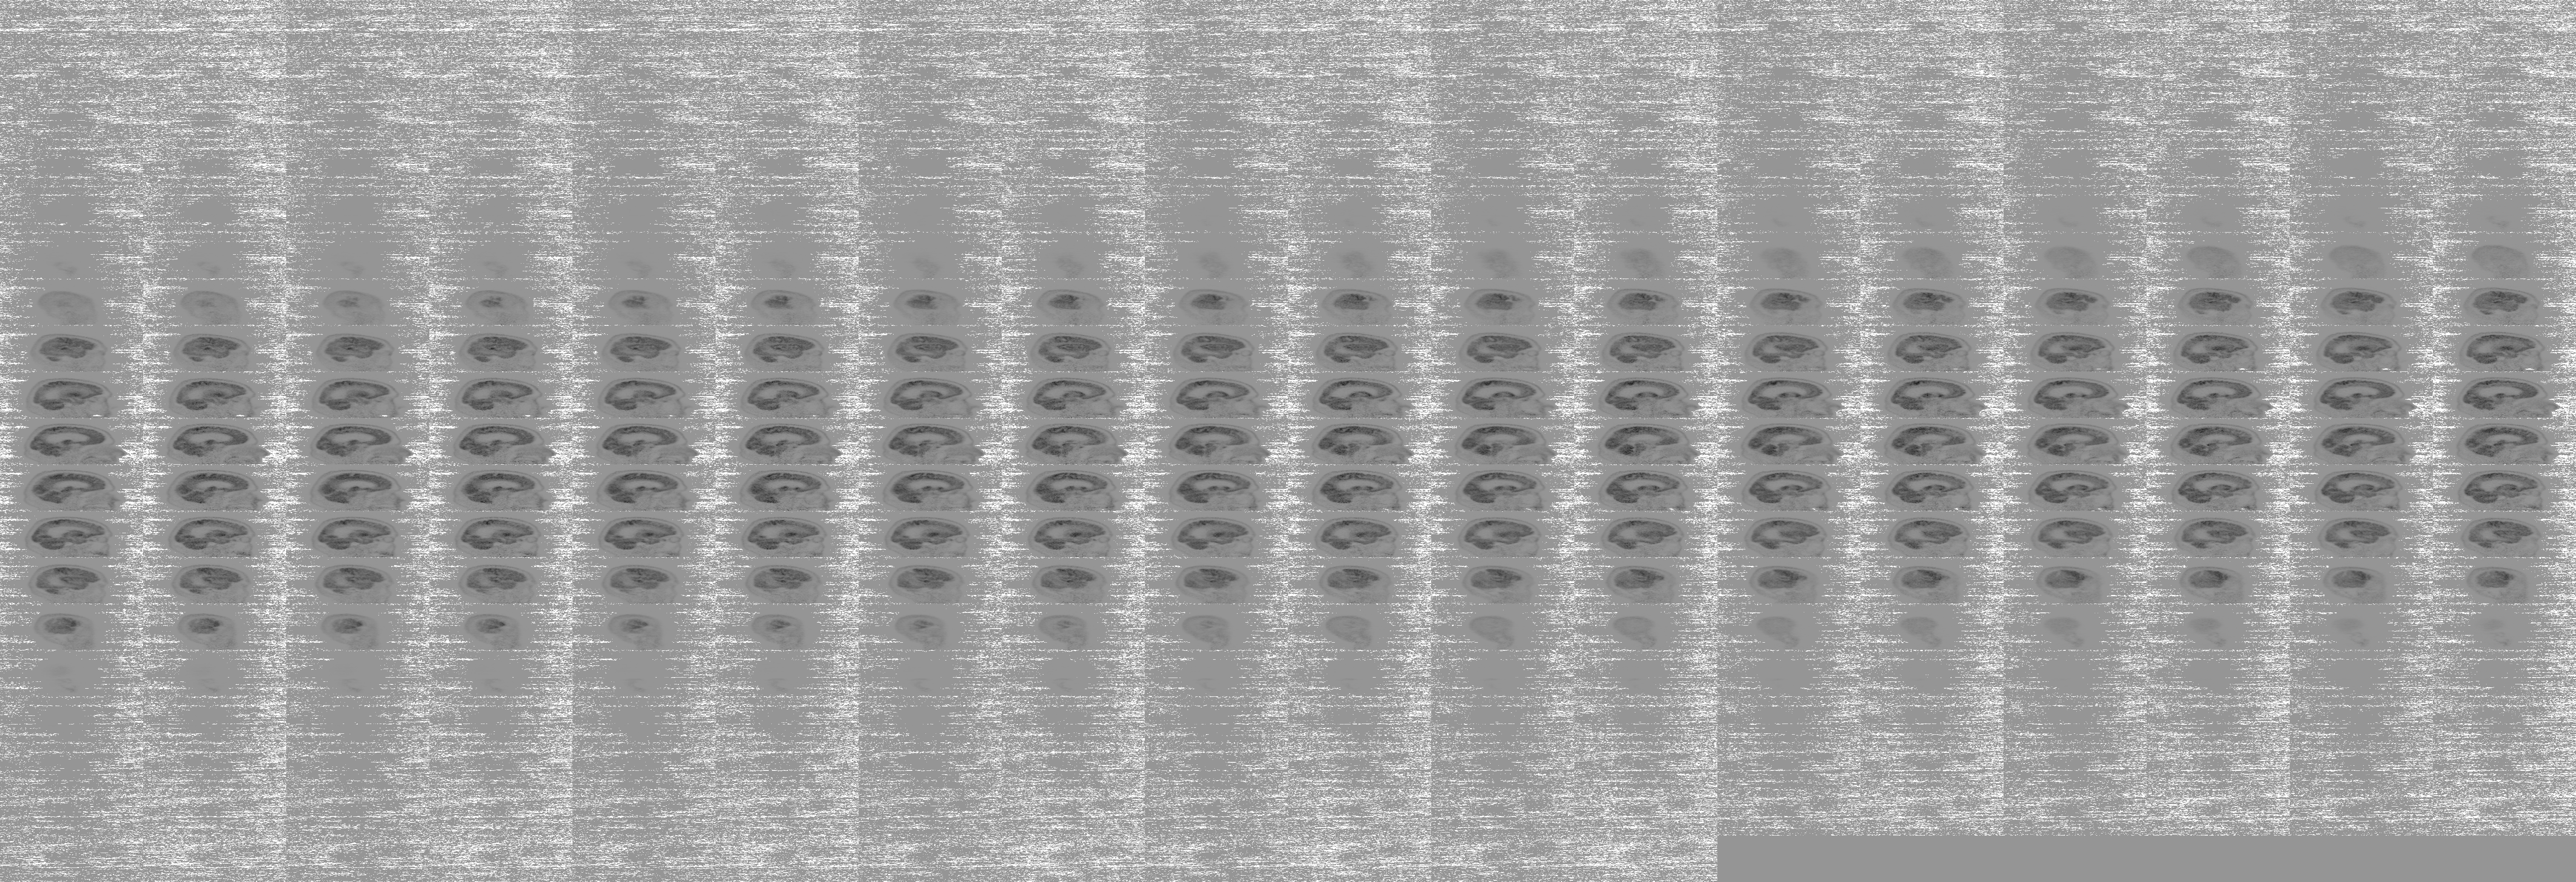

In [ ]:
fdg_pet = load_img(os.path.join(data_dir, 'fdg_pet_nifti', 'averaged_functional_images.nii.gz'))
view_img(fdg_pet, cmap="Greys", bg_img = None, )


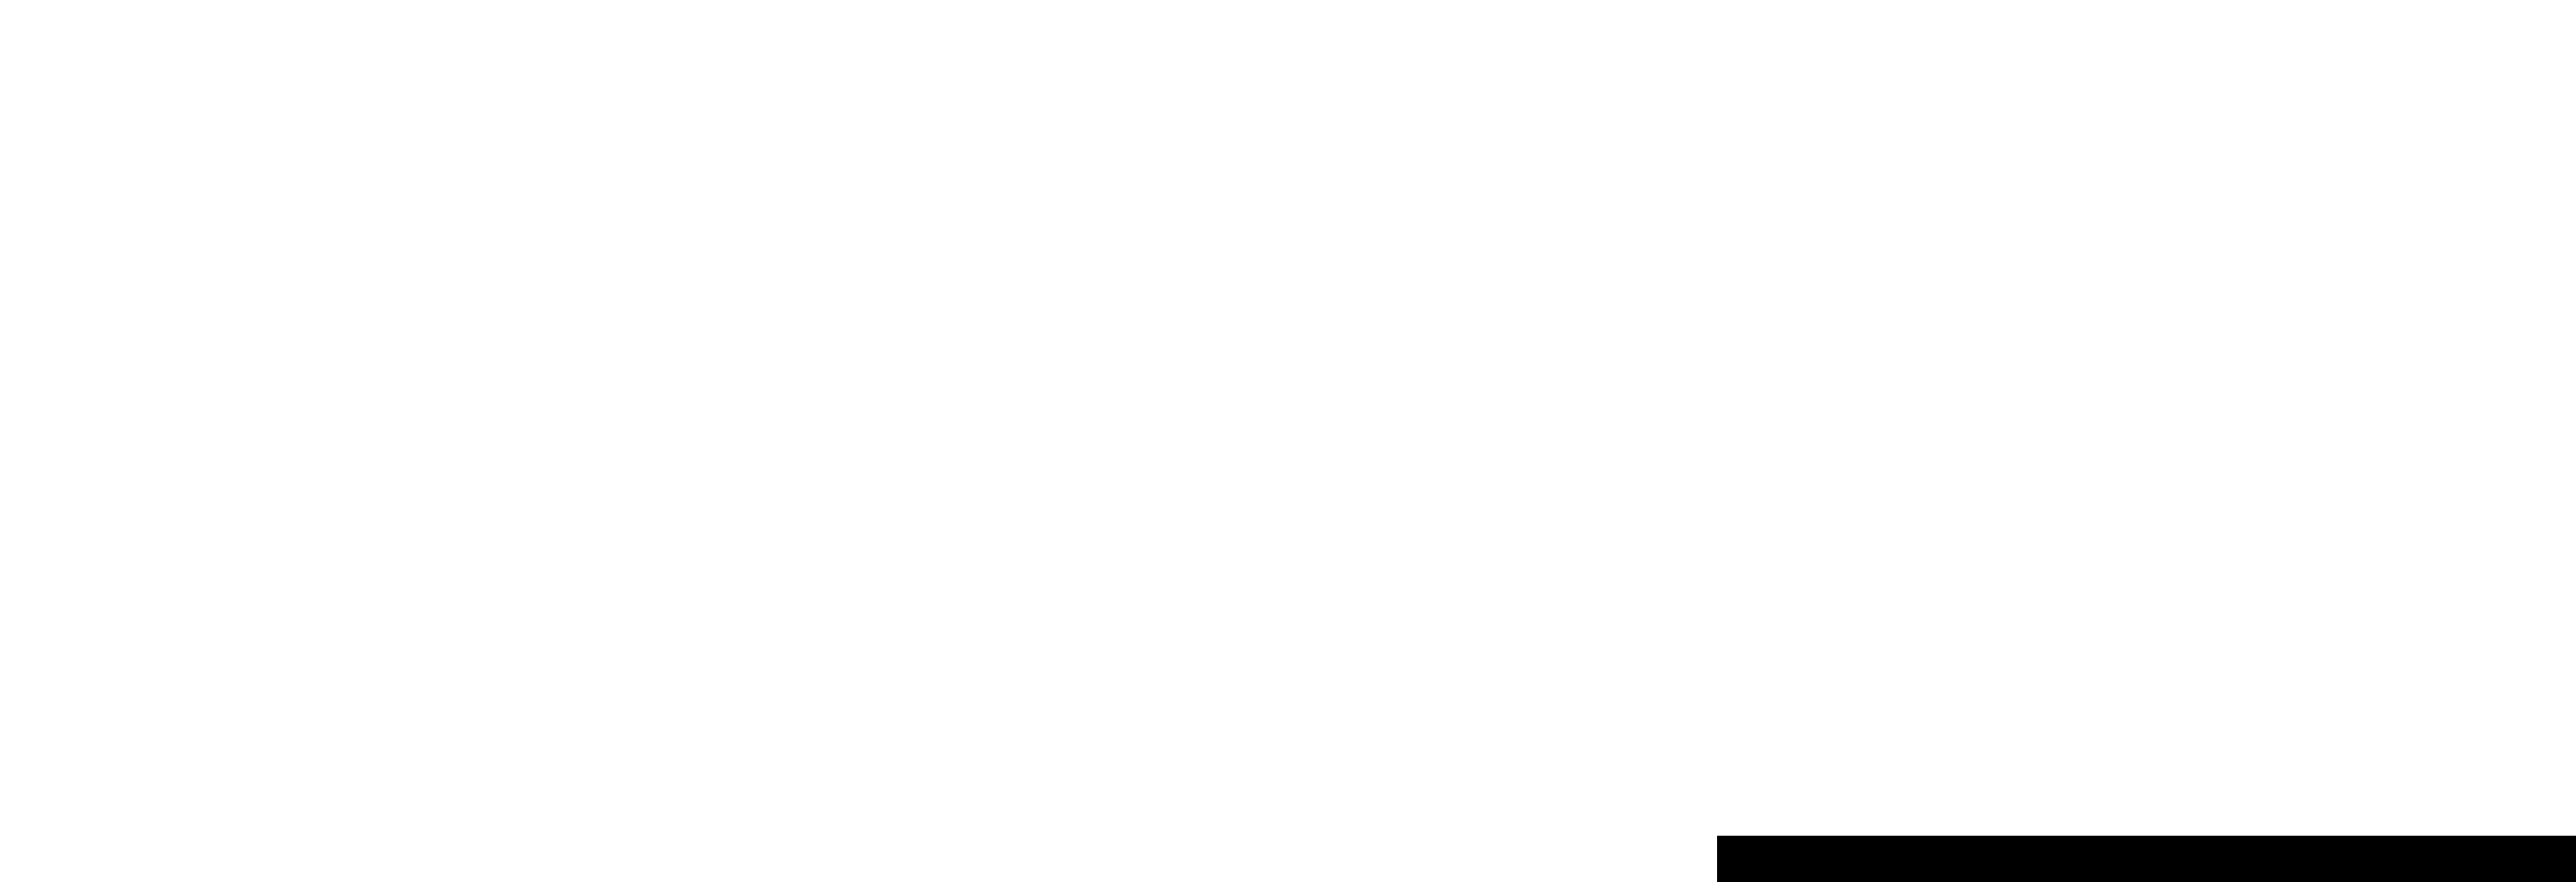
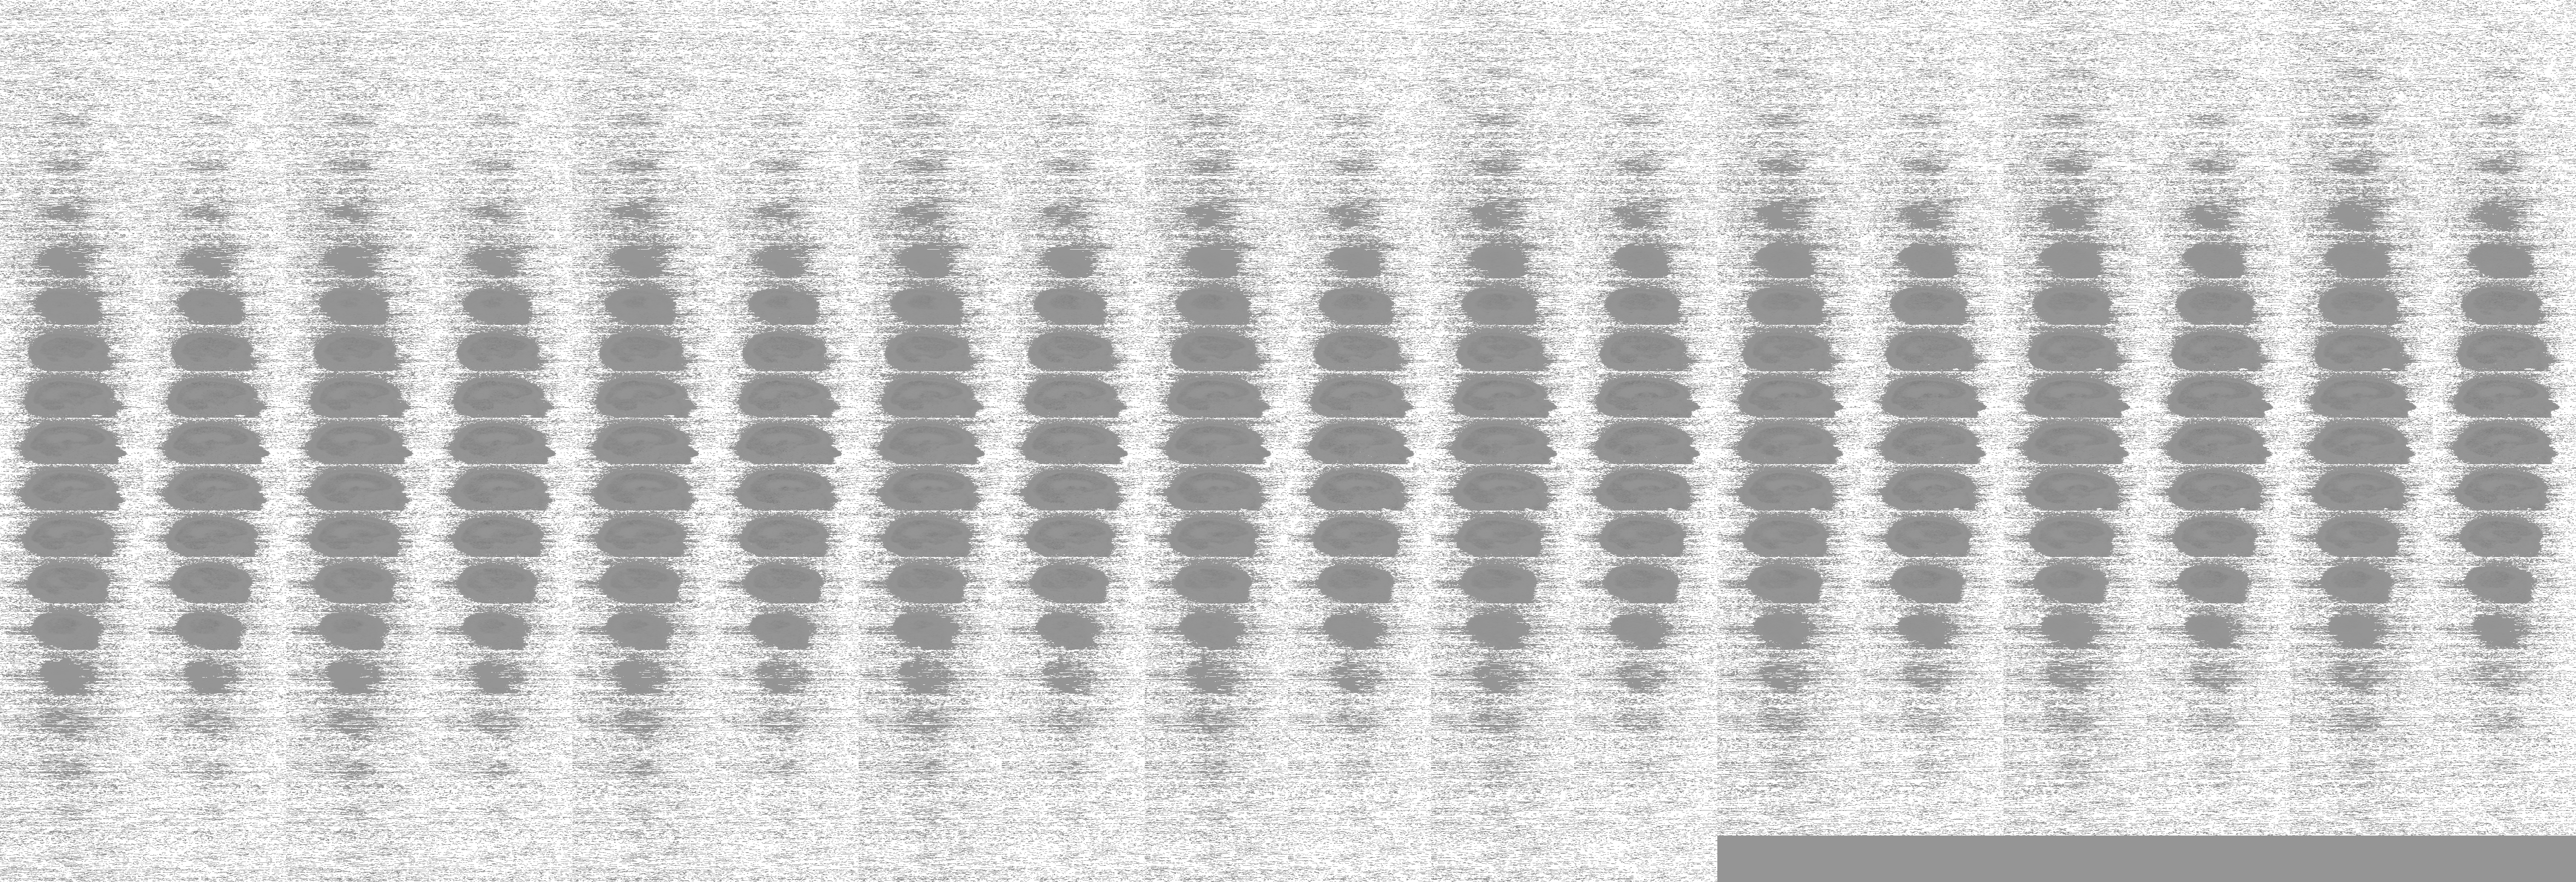

In [32]:
fdg_pet = nib.four_to_three(load_img(os.path.join(data_dir, 'fdg_pet_nifti', 'fdg_pet.nii.gz')))
view_img(fdg_pet[1], cmap="Greys", bg_img = None)